In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib
import matplotlib.pyplot as plt
import latexify as lt
#LOSO Validation
loo = LeaveOneOut()


In [9]:
n95 = pd.read_csv("n95data-p1.csv").dropna()
print("Total Data Points = ",len(n95))
n95.head(7)

Total Data Points =  10


,Unnamed: 0,Filename,rPEF,rFEV1,rFVC,rFEVFVC,tPEF,tFEV1,tFVC,tFEVFVC,PEFdiff,FEVdiff,FVCdiff,age,height
0,2,006_FVC_N95_1.json,9.426188,1.957211,2.547454,76.830098,5.57,2.77,3.02,91.721854,-3.856188,0.812789,0.472546,27,155
1,10,012_FVC_N95_2.json,9.541296,1.602125,2.243371,71.415974,5.47,2.40,2.72,88.235294,-4.071296,0.797875,0.476629,25,163
2,15,Anubhav_FVC_N95Mask_1.json,9.910800,2.477272,3.786664,65.420948,6.05,3.33,4.33,76.905312,-3.860800,0.852728,0.543336,21,180
3,18,Rishiraj_FVC_N95Mask_1.json,12.438241,2.250131,2.983454,75.420321,8.30,3.02,3.49,86.532951,-4.138241,0.769869,0.506546,28,165
4,21,Rohit_FVC_N95Mask_2.json,12.282675,2.874539,3.737664,76.907372,7.79,3.65,4.24,86.084906,-4.492675,0.775461,0.502336,21,170
5,14,014_FVC_N95_2.json,10.651584,1.759281,2.005181,87.736791,6.16,2.41,2.52,95.634921,-4.491584,0.650719,0.514819,25,165
6,16,017_FVC_N95_2.json,9.194612,1.098786,3.048900,36.038764,5.03,1.98,2.42,81.818182,-4.164612,0.881214,-0.628900,55,160


N95 Mask Only

In [10]:
#FEV1
#X = np.array([[i] for i in n95['rFEV1']])
X = np.array(n95[['rFEV1', 'age', 'height']])
y=  np.array([i for i in n95['tFEV1']])
loo.get_n_splits(X)
print("****Running Regression on FEV1****")
mse=0
FEVpe= [] 
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = LinearRegression().fit(X_train, y_train)
    #print("Learned coef is = ",reg.coef_[0])
    #print("Learned intercept is = ",reg.intercept_)
    print("Predicted FEV1= ", reg.predict(X_test))
    print("True FEV1 = ", y_test)
    mse = mse+mean_squared_error(reg.predict(X_test), y_test)
    FEVpe.append(np.abs((y_test-reg.predict(X_test))/reg.predict(X_test)))
    '''
    if (np.abs((y_test-reg.predict(X_test))/y_test)<pe):
        Npe = np.abs((y_test-reg.predict(X_test))/y_test)
        NFEVc = reg.coef_[0] #coefficient
        NFEVi =  reg.intercept_ #intercept
    '''
    #pe= pe+np.abs((y_test-reg.predict(X_test))/y_test)
    #print("MSE = ", mean_squared_error(reg.predict(X_test), y_test))
    #print("Percentage Error", np.abs((y_test-reg.predict(X_test))/y_test)[0]*100)
    #print("\n")
#print("Percentage Error", Npe);
#print("Learned coef is = ",NFEVc)
#print("Learned intercept is = ",NFEVi)
#mse = mse/loo.get_n_splits(X)
#n95_mse.append(mse)
#n95_pe.append(pe[0])
print("PE Mean = ", np.mean(FEVpe));
print("PE STD = ", np.std(FEVpe))



#FVC
#X = np.array([[i] for i in n95['rFVC']])
X = np.array(n95[['rFEV1', 'age', 'height']])
y=  np.array([i for i in n95['tFVC']])
loo.get_n_splits(X)
print("\n\n****Running Regression on FVC****")
mse=0
FVCpe=[]
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = LinearRegression().fit(X_train, y_train)
    #print("Learned coef is = ",reg.coef_[0])
    #print("Learned intercept is = ",reg.intercept_)
    #print(X_train, X_test, y_train, y_test)
    #print("FVC with N95")
    #print("Coef = ",reg.coef_)
    #print("Intercept = ", reg.intercept_)
    print("Predicted FVC= ", reg.predict(X_test))
    print("True FVC = ", y_test)
    mse = mse+mean_squared_error(reg.predict(X_test), y_test)
    FVCpe.append(np.abs((y_test-reg.predict(X_test))/reg.predict(X_test)))
    '''
    if (np.abs((y_test-reg.predict(X_test))/y_test)<pe):
        Npe = np.abs((y_test-reg.predict(X_test))/y_test)
        NFVCc = reg.coef_[0] #coefficient
        NFVCi =  reg.intercept_ #intercept
    #print("MSE = ", mean_squared_error(reg.predict(X_test), y_test))
    #print("Percentage Error", np.abs((y_test-reg.predict(X_test))/y_test)[0]*100)
    #print("\n")  
    '''
#mse = mse/loo.get_n_splits(X)
#pe=pe/loo.get_n_splits(X)
#n95_mse.append(mse)
#n95_pe.append(pe[0])
#print("Percentage Error", Npe);
#print("Learned coef is = ",NFVCc)
#print("Learned intercept is = ",NFVCi)
print("PE Mean = ", np.mean(FVCpe));
print("PE STD = ", np.std(FVCpe))

#PEF 1 1 2
#X = np.array([[i] for i in n95['rPEF']])
X = np.array(n95[['rFEV1', 'age', 'height']])
y=  np.array([i for i in n95['tPEF']])
loo.get_n_splits(X)
print("\n\n****Running Regression on PEF****")
mse=0
PEFpe= []
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = LinearRegression().fit(X_train, y_train)
    #print("Learned coef is = ",reg.coef_[0])
    #print("Learned intercept is = ",reg.intercept_)
    print("Predicted PEF= ", reg.predict(X_test))
    print("True PEF = ", y_test)
    mse = mse+mean_squared_error(reg.predict(X_test), y_test)
    PEFpe.append(np.abs((y_test-reg.predict(X_test))/reg.predict(X_test)))
    '''
    if (np.abs((y_test-reg.predict(X_test))/y_test)<pe):
        Npe = np.abs((y_test-reg.predict(X_test))/y_test)
        NPEFc = reg.coef_[0] #coefficient
        NPEFi =  reg.intercept_ #intercept
    #print("MSE = ", mean_squared_error(reg.predict(X_test), y_test))
    #print("Percentage Error", np.abs((y_test-reg.predict(X_test))/y_test)[0]*100)
    #print("\n")
    '''
#mse = mse/loo.get_n_splits(X)
#pe=pe/loo.get_n_splits(X)
#n95_mse.append(mse)
#n95_pe.append(pe[0])
#print("Percentage Error", Npe);
#print("Learned coef is = ",NPEFc)
#print("Learned intercept is = ",NPEFi)
print("PE Mean = ", np.mean(PEFpe));
print("PE STD = ", np.std(PEFpe))

****Running Regression on FEV1****
TRAIN: [1 2 3 4 5 6 7 8 9] TEST: [0]
Predicted FEV1=  [2.12459186]
True FEV1 =  [2.77]
TRAIN: [0 2 3 4 5 6 7 8 9] TEST: [1]
Predicted FEV1=  [2.55337312]
True FEV1 =  [2.4]
TRAIN: [0 1 3 4 5 6 7 8 9] TEST: [2]
Predicted FEV1=  [3.54799131]
True FEV1 =  [3.33]
TRAIN: [0 1 2 4 5 6 7 8 9] TEST: [3]
Predicted FEV1=  [2.76522622]
True FEV1 =  [3.02]
TRAIN: [0 1 2 3 5 6 7 8 9] TEST: [4]
Predicted FEV1=  [3.16046938]
True FEV1 =  [3.65]
TRAIN: [0 1 2 3 4 6 7 8 9] TEST: [5]
Predicted FEV1=  [2.69997038]
True FEV1 =  [2.41]
TRAIN: [0 1 2 3 4 5 7 8 9] TEST: [6]
Predicted FEV1=  [0.35179262]
True FEV1 =  [1.98]
TRAIN: [0 1 2 3 4 5 6 8 9] TEST: [7]
Predicted FEV1=  [3.50630886]
True FEV1 =  [2.71]
TRAIN: [0 1 2 3 4 5 6 7 9] TEST: [8]
Predicted FEV1=  [3.27848964]
True FEV1 =  [3.31]
TRAIN: [0 1 2 3 4 5 6 7 8] TEST: [9]
Predicted FEV1=  [2.58931768]
True FEV1 =  [2.09]
PE Mean =  0.5837583872673384
PE STD =  1.3507814791845185


****Running Regression on FVC****
T

### Sensor Position on N95

In [280]:
sensorP = pd.read_csv('sensorPositionData-rPFT.csv')
sensorP.head()

,Unnamed: 0,Filename,rPEF,rFEV1,rFVC,FEVFVC
0,0,Rishi_SensorPosition-Left-1.json,13.611946,1.778953,2.304269,77.202467
1,2,Rishi_SensorPosition-Top-2.json,11.066166,1.669344,2.405819,69.387764
2,3,Rishi_SensorPosition-Top-3.json,8.445552,1.642943,2.434727,67.479542
3,4,Rishi_SensorPosition-Top.json,9.007623,1.625643,2.435693,66.742510
4,1,Rishi_SensorPosition-Right-1.json,6.628649,1.424302,2.573963,55.334973


In [285]:
#percentage error based on pisition of the mask
(np.abs(((np.abs(FEVc*sensorP['rFEV1']+FEVi)/np.abs(FVCc*sensorP['rFVC']+FVCi)) - (3.02/3.49))/(3.02/3.49))*100)

0    3.019563
1    1.538171
2    2.950047
3    1.988562
4    3.797520
dtype: float64

### Cloth Mask

In [5]:
cloth = pd.read_csv("clothData-p1.csv").dropna()
print("Total Data Points = ",len(cloth))
cloth.head()

Total Data Points =  9


,Unnamed: 0,Filename,rPEF,rFEV1,rFVC,rFEVFVC,tPEF,tFEV1,tFVC,tFEVFVC,PEFdiff,FEVdiff,FVCdiff,age,height
0,10,012_FVC_Cloth_1.json,6.746198,1.670473,2.021462,82.636889,5.47,2.40,2.72,88.235294,-1.276198,0.729527,0.698538,25,163
1,15,Raviraj_FVC_Cloth_2.json,9.607930,2.215504,2.610347,84.873939,7.68,2.88,3.30,87.272727,-1.927930,0.664496,0.689653,30,168
2,18,Rohit_FVC_ClothMask_1.json,9.693360,2.658542,3.215241,82.685597,7.79,3.41,3.82,89.267016,-1.903360,0.751458,0.604759,21,170
3,4,008_FVC_Cloth_1.json,9.045314,2.271070,2.499572,90.858388,7.23,2.98,3.11,95.819936,-1.815314,0.708930,0.610428,22,177
4,8,014_FVC_Cloth_2.json,7.663355,1.692981,1.904263,88.904823,6.16,2.41,2.52,95.634921,-1.503355,0.717019,0.615737,25,165


In [6]:
#FEV1
X = np.array(cloth[['rFEV1', 'age', 'height']])
y=  np.array([i for i in cloth['tFEV1']])
loo.get_n_splits(X)
print("****Running Regression on FEV1****")
mse=0
FEVpeN95 = []
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = LinearRegression().fit(X_train, y_train)
    #print("Learned coef is = ",reg.coef_[0])
    #print("Learned intercept is = ",reg.intercept_)
    print("Predicted FEV1= ", reg.predict(X_test))
    print("True FEV1 = ", y_test)
    mse = mse+mean_squared_error(reg.predict(X_test), y_test)
    FEVpeN95.append(np.abs((y_test-reg.predict(X_test))/reg.predict(X_test)))
    '''
    if (np.abs((y_test-reg.predict(X_test))/y_test)<pe):
        pe = np.abs((y_test-reg.predict(X_test))/y_test)
        FEVc = reg.coef_[0] #coefficient
        FEVi =  reg.intercept_ #intercept
    #pe= pe+np.abs((y_test-reg.predict(X_test))/y_test)
    #print("MSE = ", mean_squared_error(reg.predict(X_test), y_test))
    #print("Percentage Error", np.abs((y_test-reg.predict(X_test))/y_test)[0]*100)
    #print("\n")
    '''
#print("Percentage Error", pe);
#print("Learned coef is = ",FEVc)
#print("Learned intercept is = ",FEVi)
print("PE Mean = ", np.mean(FEVpeN95));
print("PE STD = ", np.std(FEVpeN95))

#FVC
X = np.array(cloth[['rFEV1', 'age', 'height']])
y=  np.array([i for i in cloth['tFVC']])
loo.get_n_splits(X)
print("\n\n****Running Regression on FVC****")
mse=0
FVCpeN95 = []
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = LinearRegression().fit(X_train, y_train)
    #print("Learned coef is = ",reg.coef_[0])
    #print("Learned intercept is = ",reg.intercept_)
    #print(X_train, X_test, y_train, y_test)
    #print("FVC with N95")
    #print("Coef = ",reg.coef_)
    #print("Intercept = ", reg.intercept_)
    print("Predicted FVC= ", reg.predict(X_test))
    print("True FVC = ", y_test)
    mse = mse+mean_squared_error(reg.predict(X_test), y_test)
    FVCpeN95.append(np.abs((y_test-reg.predict(X_test))/reg.predict(X_test)))
    '''
    if (np.abs((y_test-reg.predict(X_test))/y_test)<pe):
        pe = np.abs((y_test-reg.predict(X_test))/y_test)
        FVCc = reg.coef_[0] #coefficient
        FVCi =  reg.intercept_ #intercept
    #print("MSE = ", mean_squared_error(reg.predict(X_test), y_test))
    #print("Percentage Error", np.abs((y_test-reg.predict(X_test))/y_test)[0]*100)
    #print("\n")
    '''
#mse = mse/loo.get_n_splits(X)
#pe=pe/loo.get_n_splits(X)
#n95_mse.append(mse)
#n95_pe.append(pe[0])
#print("Percentage Error", pe);
#print("Learned coef is = ",FVCc)
#print("Learned intercept is = ",FVCi)
print("PE Mean = ", np.mean(FVCpeN95));
print("PE STD = ", np.std(FVCpeN95))



#PEF 
X = np.array(cloth[['rFEV1', 'age', 'height']])
y=  np.array([i for i in cloth['tFVC']])
loo.get_n_splits(X)
print("\n\n****Running Regression on PEF****")
mse=0
PEFpeN95 = [] 
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = LinearRegression().fit(X_train, y_train)
    #print("Learned coef is = ",reg.coef_[0])
    #print("Learned intercept is = ",reg.intercept_)
    print("Predicted PEF= ", reg.predict(X_test))
    print("True PEF = ", y_test)
    mse = mse+mean_squared_error(reg.predict(X_test), y_test)
    PEFpeN95.append(np.abs((y_test-reg.predict(X_test))/reg.predict(X_test)))
    '''
    if (np.abs((y_test-reg.predict(X_test))/y_test)<pe):
        pe = np.abs((y_test-reg.predict(X_test))/y_test)
        PEFc = reg.coef_[0] #coefficient
        PEFi =  reg.intercept_ #intercept
    #print("MSE = ", mean_squared_error(reg.predict(X_test), y_test))
    #print("Percentage Error", np.abs((y_test-reg.predict(X_test))/y_test)[0]*100)
    #print("\n")
    '''
#mse = mse/loo.get_n_splits(X)
#pe=pe/loo.get_n_splits(X)
#n95_mse.append(mse)
#n95_pe.append(pe[0])
#print("Percentage Error", pe);
#print("Learned coef is = ",PEFc)
#print("Learned intercept is = ",PEFi)
print("PE Mean = ", np.mean(PEFpeN95));
print("PE STD = ", np.std(PEFpeN95))

****Running Regression on FEV1****
TRAIN: [1 2 3 4 5 6 7 8] TEST: [0]
Predicted FEV1=  [2.41531837]
True FEV1 =  [2.4]
TRAIN: [0 2 3 4 5 6 7 8] TEST: [1]
Predicted FEV1=  [2.72429185]
True FEV1 =  [2.88]
TRAIN: [0 1 3 4 5 6 7 8] TEST: [2]
Predicted FEV1=  [3.02419298]
True FEV1 =  [3.41]
TRAIN: [0 1 2 4 5 6 7 8] TEST: [3]
Predicted FEV1=  [3.5902701]
True FEV1 =  [2.98]
TRAIN: [0 1 2 3 5 6 7 8] TEST: [4]
Predicted FEV1=  [2.54115906]
True FEV1 =  [2.41]
TRAIN: [0 1 2 3 4 6 7 8] TEST: [5]
Predicted FEV1=  [2.83880025]
True FEV1 =  [2.89]
TRAIN: [0 1 2 3 4 5 7 8] TEST: [6]
Predicted FEV1=  [1.73107322]
True FEV1 =  [1.8]
TRAIN: [0 1 2 3 4 5 6 8] TEST: [7]
Predicted FEV1=  [2.00427376]
True FEV1 =  [1.98]
TRAIN: [0 1 2 3 4 5 6 7] TEST: [8]
Predicted FEV1=  [3.70139706]
True FEV1 =  [2.71]
PE Mean =  0.08338577927426187
PE STD =  0.08323854626774825


****Running Regression on FVC****
TRAIN: [1 2 3 4 5 6 7 8] TEST: [0]
Predicted FVC=  [2.41903511]
True FVC =  [2.72]
TRAIN: [0 2 3 4 5 6 7 8

In [7]:
n95_pe = [np.mean(FEVpeN95), np.mean(FVCpeN95), np.mean(PEFpeN95)]
cloth_pe = [np.mean(FEVpe), np.mean(FVCpe), np.mean(PEFpe)]

n95_std = [np.std(FEVpeN95), np.std(FVCpeN95), np.std(PEFpeN95)]
cloth_std = [np.std(FEVpe), np.std(FVCpe), np.std(PEFpe)]

In [14]:
print(n95_pe)
print(cloth_pe)

[4.463149535582715, 12.707448740940213, 12.707448740940213]
[5.36378473333357, 15.496521815821973, 47.40573047200127]


C:\ProgramData\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


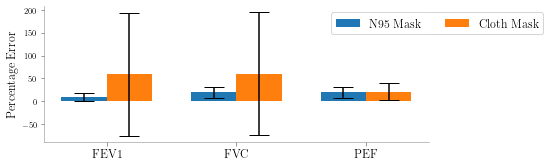

In [8]:
figname = 'FVCerror-age-height'
lt.latexify(columns=2, fig_height=2.5)
labels = ['FEV1', 'FVC', 'PEF']
#cloth_param = [0.48806677153707256, 0.4806901243588203, 4.0307028181078834]
#n95_param = [0.06917450064896391, 0.04246926740883565, 3.089989401165248]

#n95_pe = [0.035*100, 0.042*100, 0.046*100]
#cloth_pe = [0.045*100, 0.041*100, 0.092*100]

#n95_std = [2.5, 1.3, 2.3]
#cloth_std = [1.1, 1.1, 1.9]

n95_pe = [100*i for i in n95_pe]
n95_std = [100*i for i in n95_std]

cloth_pe = [100*i for i in cloth_pe]
cloth_std = [100*i for i in cloth_std]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()#figsize=(8,6)
rects1 = ax.bar(x - width/2, n95_pe, width, label='N95 Mask', yerr=n95_std, ecolor='black', capsize=10)
rects2 = ax.bar(x + width/2, cloth_pe, width, label='Cloth Mask', yerr=cloth_std, ecolor='black', capsize=10)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage Error',fontsize=12)
#ax.set_title('Percentage Error For Differnet Type of Mask', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend(bbox_to_anchor=[0.73,1.],ncol=2, fontsize=12)
lt.format_axes(ax)

plt.savefig(figname+'.pdf', bbox_inches='tight')

In [11]:
print(n95_pe)
print(cloth_pe)

[8.338577927426186, 18.92636179849365, 18.92636179849365]
[58.37583872673384, 59.892903933373475, 20.893256584179177]
